<img src="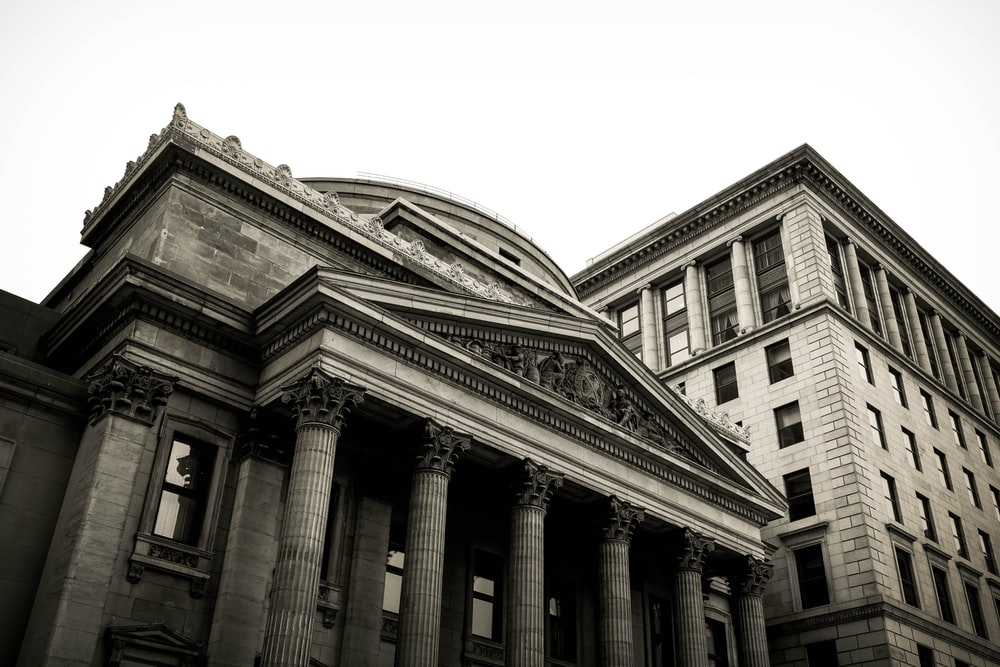
">

# Project: Market Campaign Analysis of a Bank

In this project we will be working with the dataset of the marketing campaigns of a Portuguese banking institution. We will analyse how the campaigns performed and identify the potential strategies for future campaigns.

This data set contains the following features:

### Bank client data:
* age (numeric)
* job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* default: has credit in default? (categorical: 'no','yes','unknown')
* housing: has housing loan? (categorical: 'no','yes','unknown')
* loan: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
* contact: contact communication type (categorical: 'cellular','telephone') 
* month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### Other attributes:
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* emp.var.rate: employment variation rate - quarterly indicator (numeric)
* cons.price.idx: consumer price index - monthly indicator (numeric) 
* cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
* euribor3m: euribor 3 month rate - daily indicator (numeric)
* nr.employed: number of employees - quarterly indicator (numeric)

### Response Data:
* Response - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# load necessary packages
library('xlsx')
library('ggplot2')
library('dplyr')
library('plotly')
library('caTools')
library('formattable')
library('IRdisplay')
library('htmlwidgets')

In [4]:
data=read.delim('bank_campaign_data.csv',sep = ';') # load data

In [38]:
dim(data)

[1] 41188    21

In [39]:
head(data[1:16],5) 

age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate
<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<dbl>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1


In [40]:
head(data[17:21],5)

cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
93.994,-36.4,4.857,5191,no
93.994,-36.4,4.857,5191,no
93.994,-36.4,4.857,5191,no
93.994,-36.4,4.857,5191,no
93.994,-36.4,4.857,5191,no


#### Converting outcome variable, y , into numerical binary variable 1 for yes and 0 for no

In [41]:
data<-data%>%mutate(Response=case_when(y=='no'~0,y=='yes'~1,T~0)) # Converting outcome variable, y, into numerical 
                                                                  # binary variable 1 for yes, 0 for no

#### Creating a new column for age groups

In [42]:
data$Age_Group<-cut(data$age, breaks=c(0,20, 30, 40, 50,100), right = FALSE, labels = c('0-20','21-30','31-40','41-50', '50+'))

#### Lets explore the data through some visualization

In [ ]:
plot_ly(x = data$age, type = "histogram")%>%layout(title = 'Customers by age',
                                                   xaxis = list(title = 'Age of Customer'),
                                                   yaxis = list(title = 'Count'),bargap=0.1)

<img src="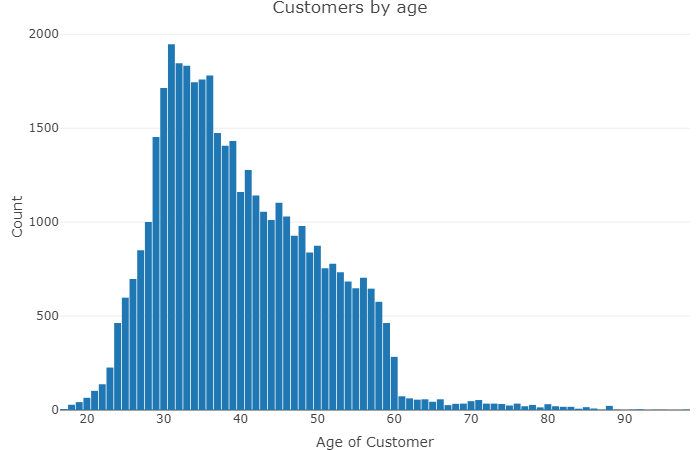
">

Majority of the customers targeted were in the age group of 30-35

In [ ]:
plot_ly(data%>%group_by(Age_Group,y)%>%summarise(Counts=n()), x = ~Age_Group, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Age Group'),
         title = 'Customers by Age Group for each type of responses',barmode = 'group')

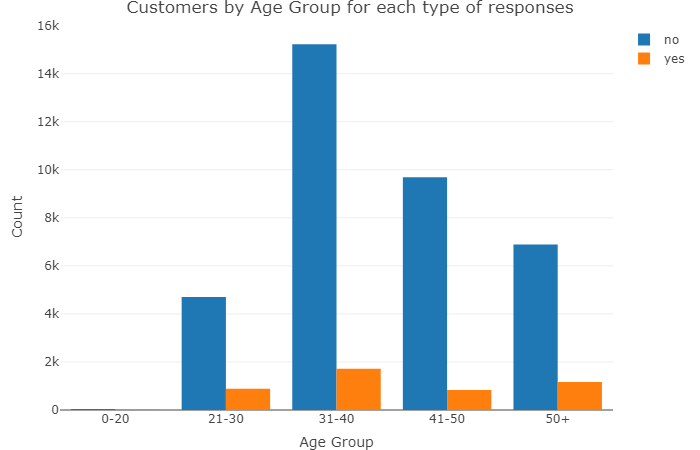

In [ ]:
plot_ly(data%>%group_by(education,y)%>%summarise(Counts=n()), x = ~education, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Education'),
         title = 'Customers by Education for each type of responses',barmode = 'group')

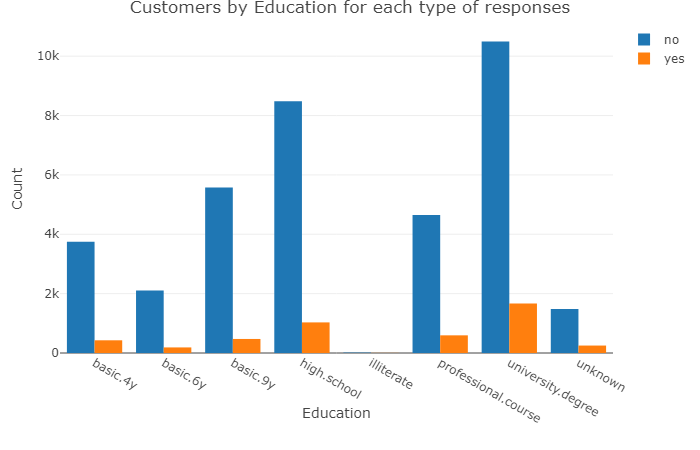

In [ ]:
plot_ly(data%>%group_by(job,y)%>%summarise(Counts=n()), x = ~job, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Job title'),
         title = 'Customers by Job title for each type of responses',barmode = 'group')

<img src="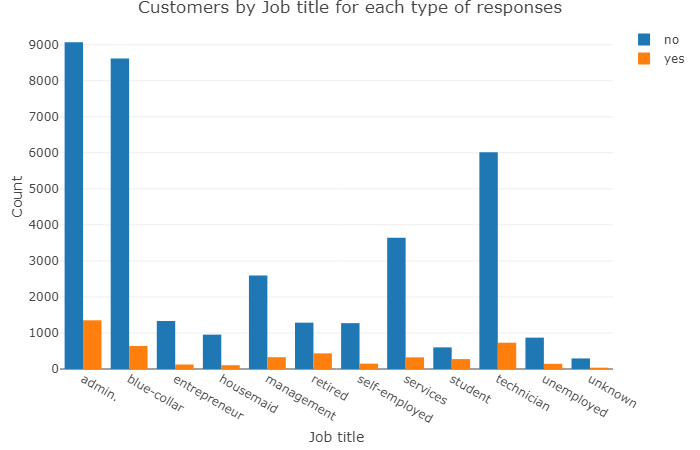
">

In [ ]:
plot_ly(data%>%group_by(marital,y)%>%summarise(Counts=n()), x = ~marital, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Marital Status'),
         title = 'Customers by Marital Status for each type of responses',barmode = 'group')

<img src="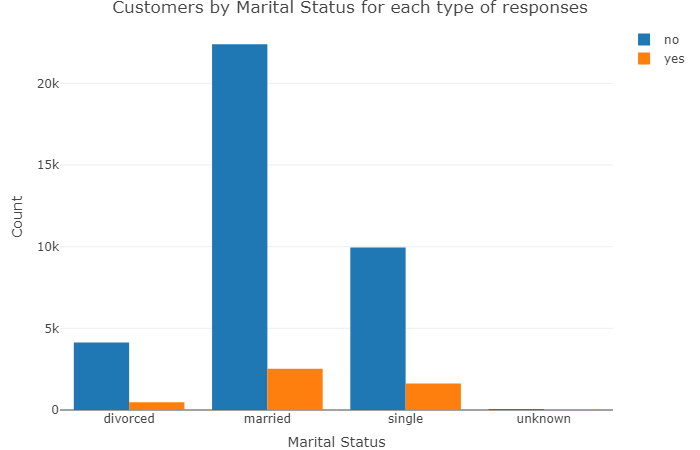
">

In [ ]:
plot_ly(data%>%group_by(contact,y)%>%summarise(Counts=n()), x = ~contact, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Contact Type'),
         title = 'Customers by Contact type for each type of responses',barmode = 'group')

<img src="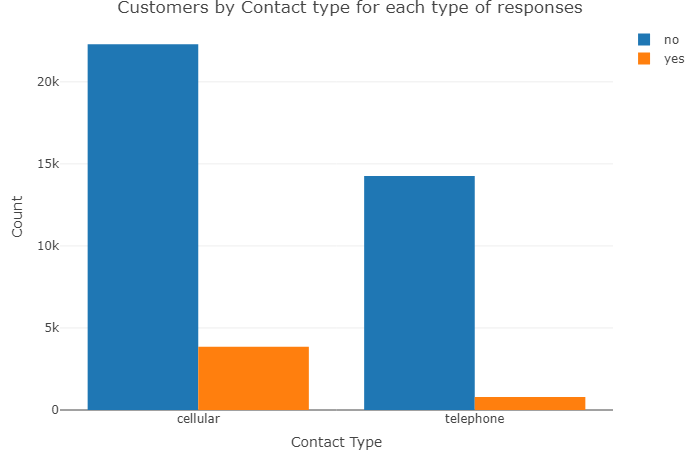
">

In [ ]:
plot_ly(data%>%group_by(month,y)%>%summarise(Counts=n()), x = ~month, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Contact Month'),
         title = 'Customers by Contact month for each type of responses',barmode = 'group')

<img src="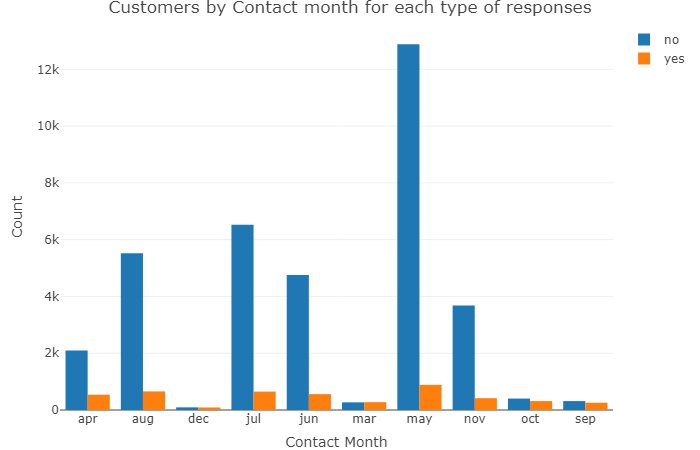
">

In [ ]:
plot_ly(data%>%group_by(day_of_week,y)%>%summarise(Counts=n()), x = ~day_of_week, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Contact day of week'),
         title = 'Customers by Contact day of week for each type of responses',barmode = 'group')

<img src="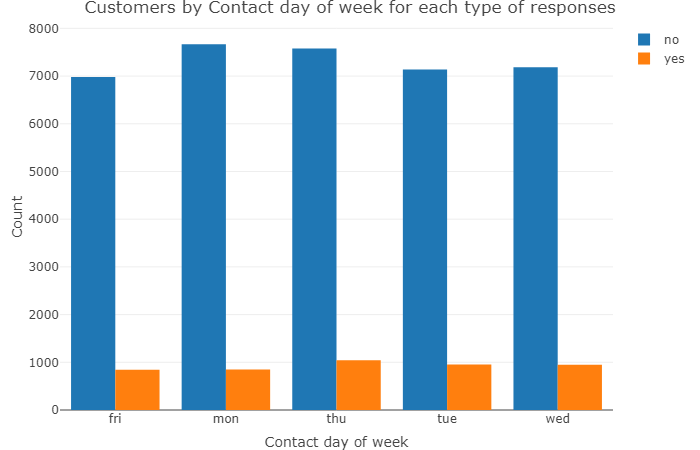
">

In [ ]:
plot_ly(data%>%group_by(housing,y)%>%summarise(Counts=n()), x = ~housing, y = ~Counts, type = 'bar',name=~y) %>%
  layout(yaxis = list(title = 'Count'), xaxis = list(title = 'Has housing loan'),
         title = 'Customers by housing loan for each type of responses',barmode = 'group')

<img src="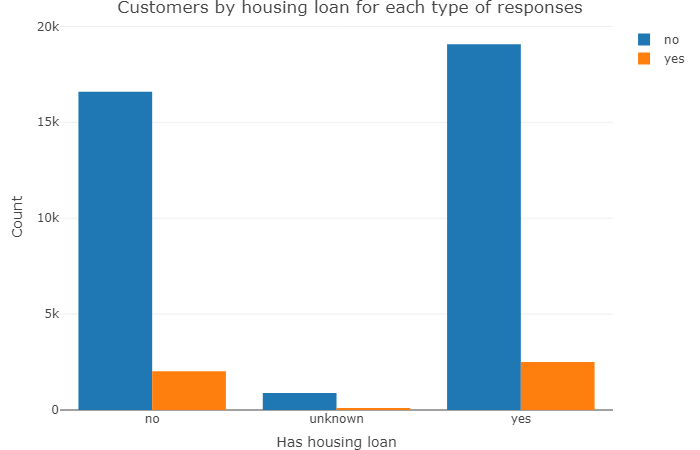
">

In [ ]:
plot_ly(data%>%group_by(emp.var.rate)%>%summarise(Response_Rate=sum(Response)*100/n()), x = ~emp.var.rate,
        y = ~Response_Rate,type = 'scatter', mode = 'lines')%>% 
layout(yaxis = list(title = 'Response Rate in %'), xaxis = list(title = 'Employment Variation Rate'),
         title = 'Response Rate vs Employment Variation Rate')

<img src="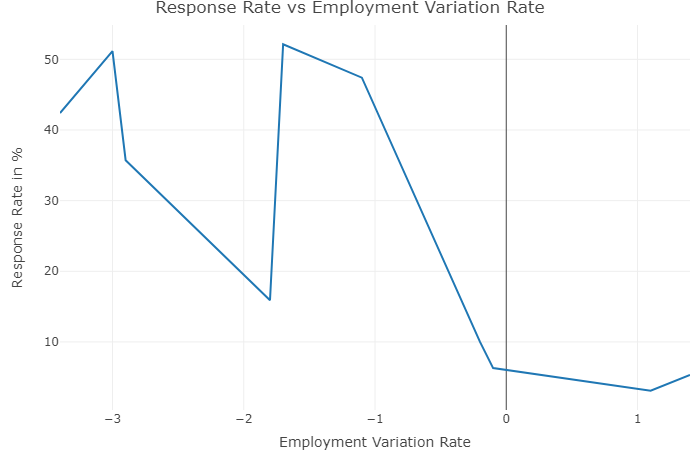
">

In [ ]:
plot_ly(data%>%group_by(cons.price.idx)%>%summarise(Response_Rate=sum(Response)*100/n()), x = ~cons.price.idx,
        y = ~Response_Rate,type = 'scatter', mode = 'lines')%>% 
layout(yaxis = list(title = 'Response Rate in %'), xaxis = list(title = 'Consumer Price Index'),
         title = 'Response Rate vs Consumer Price Index')

<img src="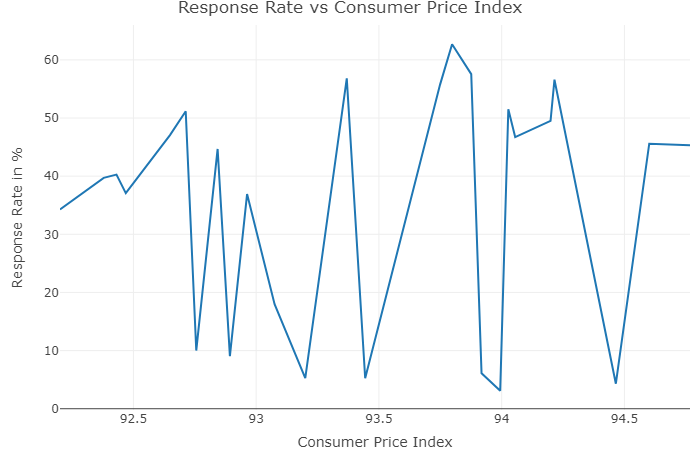
">

In [ ]:
plot_ly(data%>%group_by(cons.conf.idx)%>%summarise(Response_Rate=sum(Response)*100/n()), x = ~cons.conf.idx,
        y = ~Response_Rate,type = 'scatter', mode = 'lines')%>% 
layout(yaxis = list(title = 'Response Rate in %'), xaxis = list(title = 'Consumer Confidence Index'),
         title = 'Response Rate vs Consumer Confidence Index')

<img src="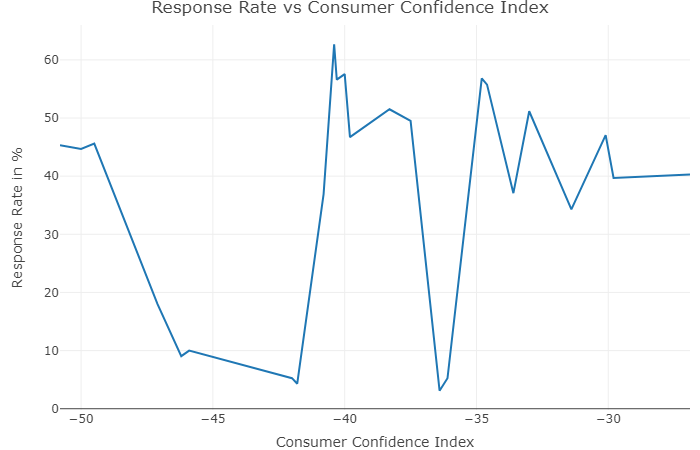
">

In [ ]:
plot_ly(data%>%group_by(nr.employed)%>%summarise(Response_Rate=sum(Response)*100/n()), x = ~nr.employed,
        y = ~Response_Rate,type = 'scatter', mode = 'lines')%>% 
layout(yaxis = list(title = 'Response Rate in %'), xaxis = list(title = 'Net Employed'),
         title = 'Response Rate vs Net Employed')

<img src="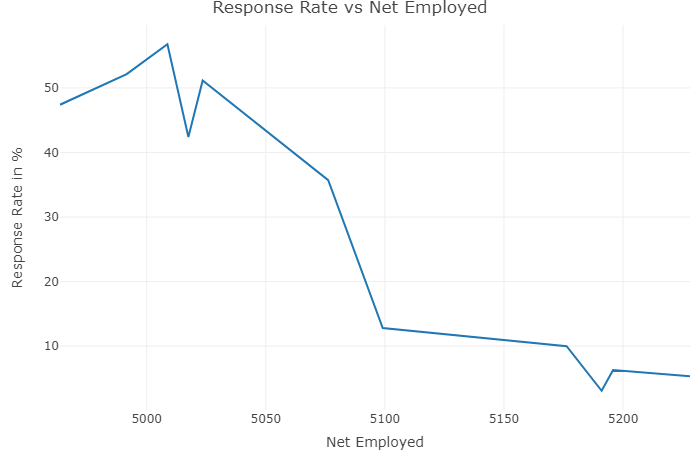
">

#### Customers Targeted, Response Rate for each campaign

In [56]:
data%>%group_by(campaign)%>%summarise(Customers_Targeted = n(),
                                                   Customers_Responded = sum(Response),
                                                   Response_Rate=percent(sum(Response)/n()))

campaign,Customers_Targeted,Customers_Responded,Response_Rate
<int>,<int>,<dbl>,<formttbl>
1,17642,2300,13.04%
2,10570,1211,11.46%
3,5341,574,10.75%
4,2651,249,9.39%
5,1599,120,7.50%
6,979,75,7.66%
7,629,38,6.04%
8,400,17,4.25%
9,283,17,6.01%


#### Define a function which calculates lift by campaign. It takes in the entire data and campaign id and provides the lift for that particular campaign

###### Lift is calculated as the percent increase or decrease in each metric for users who received a new campaign versus a control group. Since we don't have separate control group here, we randonly picked records to be part of contrrol group

In [24]:
lift<-function(data,campaignid)
{
    
    set.seed(41)
    liftfile<-data%>%filter(campaign==campaignid)
    split = sample.split(liftfile, SplitRatio = 0.9)
    test = subset(liftfile,split==TRUE)
    control = subset(liftfile,split==FALSE)
    
    test<-test%>%summarize(TestCustomers=n(),
                       TestResponders=sum(Response==1),
                       TestResponseRate=percent((TestResponders/TestCustomers)))
    control<-control%>%summarize(ControlCustomers=n(),
                       ControlResponders=sum(Response==1),
                       ControlResponseRate=percent((ControlResponders/ControlCustomers)))
  
    Lift<-percent((test$TestResponseRate-control$ControlResponseRate)/(control$ControlResponseRate))

    final<-cbind(test,control,Lift)
  print(paste0("Campaign: ", campaignid))
  return(final)
    
}

#### Now check for campaign lift by passing in the values to the lift function

In [25]:
lift(data,1);
lift(data,2);
lift(data,3);
lift(data,4);
lift(data,5);

[1] "Campaign: 1"


TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
15341,2029,13.23%,2301,271,11.78%,12.30%


[1] "Campaign: 2"


TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
9191,1054,11.47%,1379,157,11.39%,0.73%


[1] "Campaign: 3"


TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
4644,501,10.79%,697,73,10.47%,3.00%


[1] "Campaign: 4"


TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
2304,218,9.46%,347,31,8.93%,5.91%


[1] "Campaign: 5"


TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
1390,100,7.19%,209,20,9.57%,-24.82%


#### This function is to slice the data by various groups such as job, contact method, contact month etc. It takes in the data, campaign id and the group variable

In [26]:
bygroup<-function(data,id,group_var)

{
 
        set.seed(41)
    liftfile<-data%>%filter(campaign==id)
    split = sample.split(liftfile, SplitRatio = 0.9)
    test = subset(liftfile,split==TRUE)
    control = subset(liftfile,split==FALSE)
    
    
      test<-test%>%group_by_at(group_var)
      control<-control%>%group_by_at(group_var)
    
    
        test<-test%>%summarize(TestCustomers=n(),
                       TestResponders=sum(Response==1),
                       TestResponseRate=percent((TestResponders/TestCustomers)))
    control<-control%>%summarize(ControlCustomers=n(),
                       ControlResponders=sum(Response==1),
                       ControlResponseRate=percent((ControlResponders/ControlCustomers)))
  
    Lift<-percent((test$TestResponseRate-control$ControlResponseRate)/(control$ControlResponseRate))

    final<-cbind(test,control%>%select(-group_var),Lift)
    
      return(final)

}

In [27]:
bygroup(data,1,'job')

job,TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<fct>,<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
admin.,3789,588,15.52%,619,97,15.67%,-0.97%
blue-collar,3427,271,7.91%,502,31,6.18%,28.06%
entrepreneur,521,57,10.94%,75,5,6.67%,64.11%
housemaid,394,47,11.93%,65,6,9.23%,29.23%
management,1112,138,12.41%,168,22,13.10%,-5.23%
retired,677,200,29.54%,111,30,27.03%,9.31%
self-employed,514,64,12.45%,67,8,11.94%,4.28%
services,1462,123,8.41%,191,12,6.28%,33.91%
student,388,131,33.76%,46,8,17.39%,94.14%


In [28]:
bygroup(data,2,'contact')

contact,TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<fct>,<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
cellular,5812,886,15.24%,865,134,15.49%,-1.59%
telephone,3379,168,4.97%,514,23,4.47%,11.11%


In [29]:
bygroup(data,1,'month')

month,TestCustomers,TestResponders,TestResponseRate,ControlCustomers,ControlResponders,ControlResponseRate,Lift
<fct>,<int>,<int>,<formttbl>,<int>,<int>,<formttbl>,<formttbl>
apr,1152,271,23.52%,173,37,21.39%,9.99%
aug,2256,253,11.21%,340,41,12.06%,-7.00%
dec,72,34,47.22%,11,5,45.45%,3.89%
jul,2325,218,9.38%,349,29,8.31%,12.84%
jun,1778,228,12.82%,265,23,8.68%,47.75%
mar,220,122,55.45%,33,20,60.61%,-8.50%
may,5013,371,7.40%,753,44,5.84%,26.65%
nov,1843,223,12.10%,276,24,8.70%,39.15%
oct,396,180,45.45%,59,30,50.85%,-10.61%


# Campaign Performance:

* Campaign 1,2 and 3 did exceptionally well compared to other campaigns
* Campaign 1 had a lift of 12.5 % which is very high compared to other campaigns
* Even though campaign 5 had a response rate of 7.5%, it had a lift of -24.82%, which means it didn't perform well enough as compared to the control group 


# Insights:

* Majority of the customers targeted were in the age group of 30-35
* Response Rate tend to decrease at the net employed increase
* There is no clear trend by month and weekday of campaign reach and their corresponding campaign response
* Customers who had university degree education had more impact to the campaigns compared to other educations
* Admin employes responded more postively to the campaigns
* Cellular remains the most preferred contact type
* There is no clear trend by between consumer price index and consumer confidence index and their corresponding campaign response
